In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/5
8025/8025 [==============================] - 153s 18ms/step - loss: 0.5549 - accuracy: 0.7622 - val_loss: 0.4681 - val_accuracy: 0.7636
Epoch 2/5
8025/8025 [==============================] - 144s 18ms/step - loss: 0.4432 - accuracy: 0.7733 - val_loss: 0.1989 - val_accuracy: 0.9476
Epoch 3/5
8025/8025 [==============================] - 143s 18ms/step - loss: 0.1712 - accuracy: 0.9494 - val_loss: 0.1073 - val_accuracy: 0.9663
Epoch 4/5
8025/8025 [==============================] - 143s 18ms/step - loss: 0.1191 - accuracy: 0.9613 - val_loss: 0.0913 - val_accuracy: 0.9702
Epoch 5/5
8025/8025 [==============================] - 143s 18ms/step - loss: 0.1019 - accuracy: 0.9653 - val_loss: 0.1107 - val_accuracy: 0.9593
8255/8255 - 16s - loss: 0.1107 - accuracy: 0.9593
0.9592839479446411


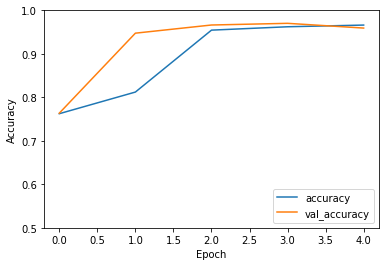

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.layers import Input,Conv1D,BatchNormalization,MaxPooling1D,LSTM,Dense,Activation,Layer
from keras import backend as K
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv("/content/drive/MyDrive/Training.csv") 
dataset = dataset.drop(['pkSeqID', 'saddr', 'daddr', 'sport', 'dport'], axis=1)

#String to Integer
dataset['proto'] = (dataset['proto'] == "udp").astype(int)
dataset['subcategory'] = (dataset['subcategory'] == "HTTP").astype(int)
dataset['category'] = (dataset['category'] == "DDoS").astype(int)

# encoding categorical variable - binary
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

dataset['proto'] = enc.fit_transform(dataset['proto'])
dataset['subcategory'] = enc.fit_transform(dataset['subcategory'])
dataset['category'] = enc.fit_transform(dataset['category'])


# splitting the dataset
from sklearn.model_selection import train_test_split
x = dataset.loc[:, 'proto':'max']
y = dataset.loc[:, 'attack' : 'category']

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, train_size=0.7)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.3)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)
# print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

#Convert to numpy arrays
x_train, y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

model = Sequential([
    #CNN                
    Conv1D(filters = 64,kernel_size = (3),strides=1,padding='same',data_format='channels_last',input_shape=(x_train.shape[1], 1)),
    BatchNormalization(),
    Activation('elu'),
    MaxPooling1D(pool_size = 4, strides = 4),

    Conv1D(filters = 64,kernel_size = (3),strides=1,padding='same'),
    BatchNormalization(),
    Activation('elu'),

    #LSTM
    LSTM(units = 15, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(15, return_sequences=True),
    Dropout(0.2),
    LSTM(15, return_sequences=True),
    Dropout(0.2),
    LSTM(15, return_sequences=True),
    Dropout(0.2),  #Dropouts  

    #Dense
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=256, epochs=5, 
          validation_data=(X_test, Y_test))

#model.evaluate(X_test, Y_test)[1]

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

print(test_acc)
















#pseudo code of data spliting and clustering

#allocating and splitting data for train and test
trainX, trainY = train_size (0.7)
testX, testY = test_size (0.3)

#scalling
min_max_scaler = scaler ()
scale_X = min_max_scaler.fit_and_transform (x)

#convert to arrays
trainX, trainY = array (scale_X), array (trainY)
testX, testY = array (testX), array (testY)

#reshaping for our CNN + LSTM model
trainX = reshape (trainX)
testX = reshape (testX) 





#pseudo code of preparing our hybrin cnn + lstm model

model = sqeualtial(filter, kernel_size, strides, padding, input_shape, units, drop)
#CNN
ConvCNN (filter, kernel_size, strides, padding, input_shape)
Normalizingbatch()
Activate ("elu")

ConvCNN (filter, kernel_size, strides, padding, input_shape)
Normalizingbatch()
Activate ("elu")

#LSTM
Lstm (units, input_shape)
Dropout (drop)
Lstm (units, input_shape)
Dropout (drop)
Lstm (units, input_shape)
Dropout (drop)
Lstm (units, input_shape)
Dropout (drop) #Dropouts

#Dense + Sigmoid
Dense (1, act = sigmoid)














